## Train the Deep Auto Encolder Model (DAE)

In [1]:
import os
import pickle

output_data_path = "output/"

##### Wavelenght Arrays (Feature Names)

In [2]:
with open('data/wvl_arr.pkl', 'rb') as f:
    base_wvl_arr = pickle.load(f)
swir_wvl_base = base_wvl_arr[0].astype(str).values
tir_wvl_base = base_wvl_arr[1].astype(str).values
tir_wvl_base = [float(w) for w in tir_wvl_base]

##### Load Training Data

In [3]:
with open(
    os.path.join(output_data_path, "prominentHill_all_spectra_cr_cu.pkl"), "rb"
) as f:
    (all_spectra_cr, all_cu) = pickle.load(f)

In [4]:
print(f"Swir Channels: {min(swir_wvl_base.astype(float))}-{max(swir_wvl_base.astype(float))}nm total of {swir_wvl_base.shape[0]}")
print(f"Tir Channels:  {min(tir_wvl_base)}-{max(tir_wvl_base)}nm total of {len(tir_wvl_base)}")
print("Data N Samples: ", all_spectra_cr.shape[0])
print("Data N Features: ", all_spectra_cr.shape[1])

Swir Channels: 380.0-2500.0nm total of 531
Tir Channels:  6000.0-14500.0nm total of 341
Data N Samples:  219363
Data N Features:  872


#### Deep Autoencoder Training

In [5]:
from spectraZones.networks import Config, AutoEncoderModel

In [6]:
# Set model hyperparameters
import torch
model_params = {
    "input_dim": all_spectra_cr.shape[1], # number of input features
    "batch_size": 256,
    "lr": 1e-3, # learning rate
    "lr_w_decay": 1e-5, # weight decay
    "start_filter": 256, # first hidden layer size
    "depth": 4, # number of hidden layers
    "criterion": torch.nn.MSELoss(), # loss function
    "optimizer": torch.optim.Adam,
    "es_patience": 10, # early stopping patience
    "es_delta": 1e-5, # early stopping delta
}

In [7]:
config = Config()
config.merge(model_params)

model_save_path = os.path.join("models", "DAE")
os.makedirs(model_save_path, exist_ok=True)

model = AutoEncoderModel(
    config,
    save_path=model_save_path,
    model_name="prominentHill_autoencolder_all_cr",
    random_seed=42,
)
print(model.nn)


-----------------------------------
Starting NN Model at device: cuda:0
-----------------------------------

AutoencoderNN(
  (encoder): Sequential(
    (lin_1): Linear(in_features=872, out_features=256, bias=True)
    (relu_1): ReLU(inplace=True)
    (lin_2): Linear(in_features=256, out_features=128, bias=True)
    (relu_2): ReLU(inplace=True)
    (lin_3): Linear(in_features=128, out_features=64, bias=True)
    (relu_3): ReLU(inplace=True)
    (lin_4): Linear(in_features=64, out_features=32, bias=True)
    (relu_4): ReLU(inplace=True)
    (lin_5): Linear(in_features=32, out_features=16, bias=True)
  )
  (decoder): Sequential(
    (lin_1): Linear(in_features=16, out_features=32, bias=True)
    (relu_1): ReLU(inplace=True)
    (lin_2): Linear(in_features=32, out_features=64, bias=True)
    (relu_2): ReLU(inplace=True)
    (lin_3): Linear(in_features=64, out_features=128, bias=True)
    (relu_3): ReLU(inplace=True)
    (lin_4): Linear(in_features=128, out_features=256, bias=True)
    (r

Start Training Model: prominentHill_autoencolder_all_cr
  - Total Epochs: 100


Training Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (inf --> 0.018831).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.018831 --> 0.003161).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.003161 --> 0.002620).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.002620 --> 0.002421).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.002421 --> 0.002250).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.002250 --> 0.002144).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.002144 --> 0.002081).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.002081 --> 0.002032).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.002032 --> 0.001996).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001996 --> 0.001976).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001976 --> 0.001933).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001933 --> 0.001915).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001915 --> 0.001892).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001892 --> 0.001873).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001873 --> 0.001858).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001858 --> 0.001846).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001846 --> 0.001834).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001834 --> 0.001822).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001822 --> 0.001811).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001811 --> 0.001801).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001801 --> 0.001782).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001782 --> 0.001769).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001769 --> 0.001755).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001755 --> 0.001744).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001744 --> 0.001726).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001726 --> 0.001711).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001711 --> 0.001697).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001697 --> 0.001683).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Validation loss decreased (0.001683 --> 0.001665).  Saving model ...


Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/857 [00:00<?, ?it/s]

EarlyStopping counter: 10 out of 10 - LR: 0.001
EarlyStopping training.


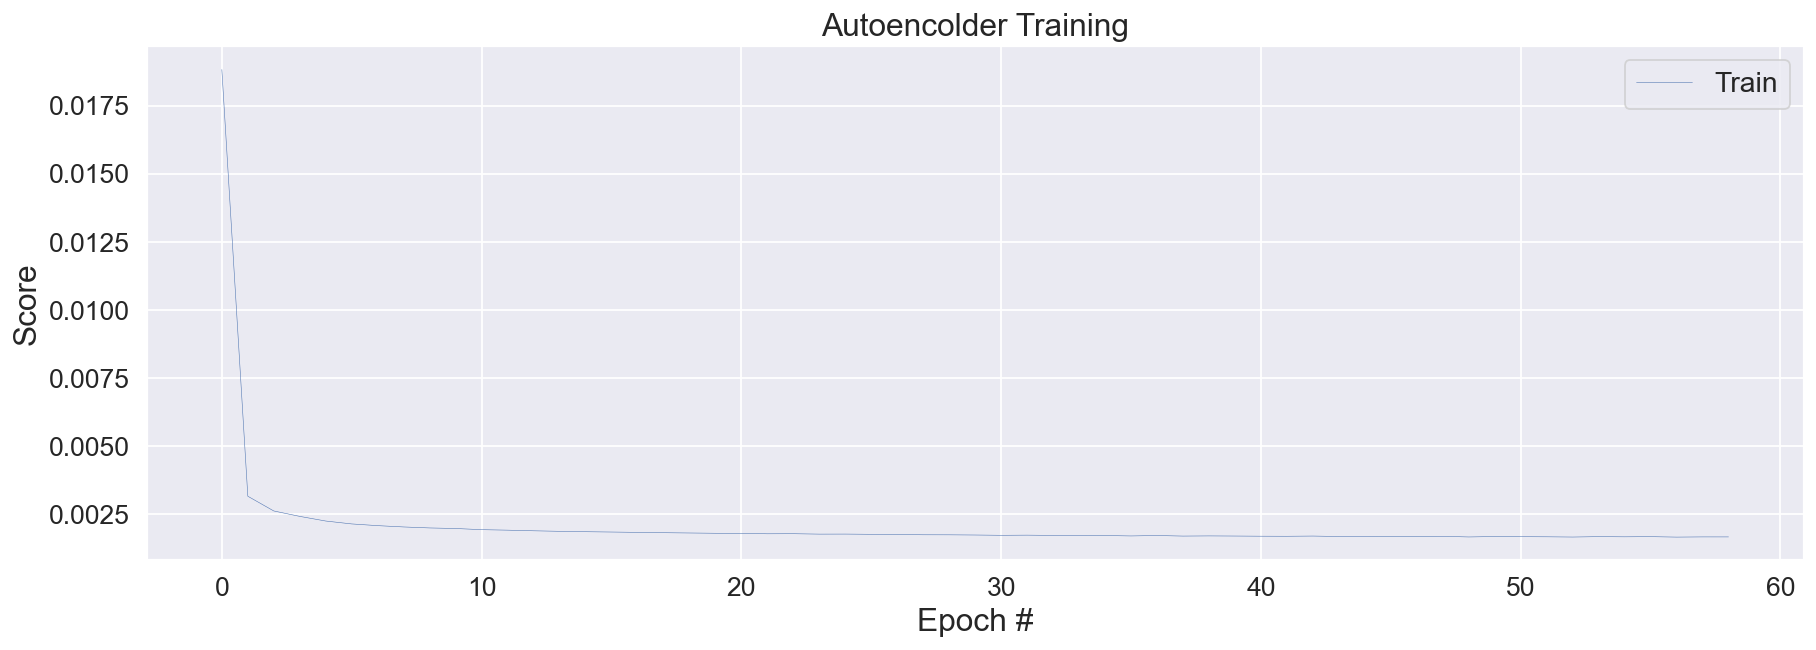

In [8]:
num_epochs = 100
model.train(all_spectra_cr, num_epochs, 250)